# P1: ROS, Kinematics, and Control

## Due: Sunday, September 18th, 2022

This is the first programming assignment you will be asked to complete in the course. You are *highly recommended* to LaTeX your solutions to this assignment and use the 10pt, 2-column `ieeeconf` template. You can find the template [on Overleaf](https://www.overleaf.com/latex/templates/preparation-of-papers-for-ieee-sponsored-conferences-and-symposia/zfnqfzzzxghk); Overleaf is an online LaTeX editor with a free tier, so feel free to use that service to compose your writeups. It is perhaps the easiest option, particularly if you are not as familiar with LaTeX. While there is no space limit, please try to keep your plots compact so that they do not consume an enormous amount of space; mostly this helps readability (and therefore grading). You are allowed to work in small groups (2 or 3 students), but your solutions and your writeup should be your own.

With these homework assignments, I expect that your solutions will be written as if they are research papers: though the content is not "new", you should be trying to convince me through your writing that you have implemented and understand the algorithms. You should write in full sentences. When appropriate, comment on when the algorithms succeed or fail and where they are more or less effective; include numbers/metrics (quantitative) in addition to discussion (qualitative) whenever possible. Just like in a published paper, you should not include code snippets in your writeup unless it is explicitly asked for or you think it helps you explain your results or answer the question. **I will ask you to submit both the PDF of your writeup *and* a .zip file containing your code (which may be a modified form of this Jupyter notebook) on Blackboard. Unless asked, do not include code in your writeup. You should present your results well enough that I trust your implementation was sufficient.** Though it would be nice if your code were cleaned up and nicely formatted/commented, we will are only likely to run your code to evaluate partial credit or unless we are skeptical for academic integrity reasons.

You are welcome to work in small groups of 2 or 3 students, but please write your solutions independently: I would like your answers to the more conceptual questions to be in your own words, even if you discussed the answers with others.

You will be graded on your included plots and answers to conceptual questions. Your code will not be directly graded or evaluated. You can receive partial credit on pretty much everything, and I try to be a fair as possible: giving you a grade that I think reflects your level of understanding of the material. Note that while I appreciate you submitting plots that you *know* are probably not quite right, it can be hard for me to evaluate partial credit if things are not quite working; in this case, try to include in your response a guess of where you think your solution didn't work. This will help me know when to give you more credit on your responses.

> Note: While additional text is appreciated and can help with partial credit, you are only being directly evaluated on the things I ask for. You do not need to write paragraphs of text describing your images. I don't want you to feel like you have to write unless I specifically ask for it.

## P1.1 Introduction to ROS

In this first question, I'm going to ask you to perform some simple operations in ROS: the Robot Operating System.

### P1.1.0 Preliminaries

**You are strongly recommended to have a machine (or virtual machine) with Ubuntu 20.04 (though another linux variety should also work) and install the accompanying ROS version—ROS Noetic—via [these installation instructions](https://wiki.ros.org/noetic/Installation). You should install ROS 1, not ROS 2. Another version *could* work, but ROS is not known for its cross-version compatability and I expect you will struggle at some point in the class if you have a nontrivial version difference.**

### P1.1.1 Simple Publisher Subscriber

Concepts: experimenting with ROS fundamentals; ensuring ROS is properly installed.

First, you'll follow some of the ROS publisher-subscriber tutorial(s). It's actually a series of short-ish tutorials:
1. https://wiki.ros.org/ROS/Tutorials/CreatingPackage This will tell you how to create a ROS package. The tutorial looks long, but it's mostly a lot of explanation. You only need to follow steps 1–4, which involves first creating a workspace (something like `mkdir -p ~/cs685_ws/src && cd ~/cs685_ws/src`), creating a package in that workspace (`catkin_create_pkg beginner_tutorials std_msgs rospy roscpp`), and then building it (via `catkin_make`).
2. https://wiki.ros.org/ROS/Tutorials/WritingServiceClient%28python%29 This will guide you to download the code into the package you just created.
3. https://wiki.ros.org/ROS/Tutorials/ExaminingPublisherSubscriber This will tell you how to run your new code and how to inspect the outputs.

**TASK** Follow the three tutorials above so that you can create a package, build it, and run the publisher/subscriber code.

**TASK** Modify the publisher so that instead of "Hello World" it says "Hello CS685!" (or something else if you'd like) in addition to the timestamp. It's a silly change, but shows me that you can find where the message is created and modify it.

**IMAGE** Run your publisher and subscriber and take a screenshot of some of the output from the subscriber. It should show that you have changed the message. Include this screenshot in your report.

> *Note*: I sometimes mention "Include this screenshot in your report." as a reminder to include it in your report. Whenever a block says **IMAGE** or **PLOT** or similar, I expect to see the image :)


### P1.1.2 Parameters and Launch Files

Concepts: creating a launch file to spawn multiple processes with one command; adding parameters to ROS scripts.

First, we will add a parameter to our talker script: the rate at which messages are published. Doing this in python is fairly simple. Modify the main body of your talker script to look like this:

```python
def talker():
    pub = rospy.Publisher('chatter', String, queue_size=10)
    rospy.init_node('talker', anonymous=True)
    # Here's the new bit: get the rate; default value 10Hz
    rate_value = rospy.get_param('rate', 10)
    rate = rospy.Rate(rate_value)
    while not rospy.is_shutdown():
        # Also, the node now says its own name
        hello_str = "Hello CS685 %s [%s]" % (
            rospy.get_time(), rospy.get_name())
        rospy.loginfo(hello_str)
        pub.publish(hello_str)
        rate.sleep()
```

**TASK** Modify your talker script to look like the above code.

If you make this change and run it again, you'll notice that ... nothing will change. Why? Because the default value of the rate is 10 and we haven't told it anything different. To do that, we'll make a launch file to spawn two such processes, each with different rates.

**TASK** Create a *launch file*. Make a new `launch` directory in your package (the `beginner_tutorials` package) and add a launch file `l01.launch` to it. Fill that file with the following:

```xml
<launch>
    <group ns="/talker_slow">
        <param name="rate" type="int" value="1" />
        <node name="slow_talker_node" pkg="beginner_tutorials" type="talker.py" output="screen" />
    </group>
    
    <group ns="/talker_fast">
        <param name="rate" type="int" value="3" />
        <node name="fast_talker_node" pkg="beginner_tutorials" type="talker.py" output="screen" />
    </group>

</launch>
```

**TASK** Run the launch file via `roslaunch beginner_tutorials l01.launch`. (Note: *if `roscore` isn't running, `roslaunch` will start it for you, so you don't need to worry about that.* Also, you can kill any process with ctrl-C.)

**IMAGE** Take a screenshot of the output of the two processes running from the single launch file and include it in your report. It should show that the "fast" talker is printing messages at roughtly 3x the rate of the "slow" one.

**QUESTION** On another terminal, you can run `rostopic list` to get the channels that you're printing to. There should now be two topics with "chatter" in the name. Explain why there are two topics instead of just one, like before. (Hint: look up the `group` syntax for ROS lanuch files.)

**IMAGES** For both of those new "chatter" topics, run `rostopic hz TOPIC_NAME` and take a screenshot of the outputs. This will show you the rate at which messages are being published to the topic and should match your intuition.


### P1.1.3 Subscribing to Multiple Topics

Concepts: creating a class that stores messages from multiple topics.

Take a look at this StackOverflow post (chosen because it's *not* a tutorial): https://stackoverflow.com/a/48846213

The post shows how to create a class that can listen to multiple topics.

**TASK** Create a Python class that does the following:
1. Subscribes to both topics (one function for each topic).
2. Upon receiving the "slow" messages, the class both publishes a message and prints out a log message to the command line. The message should contain (1) the name of your new node and (2) both previous messages (concatenated together, since they are just strings).

To do this, the callback function for the fast listener should store the message string to the class. The callback function for the slow listener should get the string from its message and combine it with the stored string from the fast message.

To grade this question, I will be looking to be sure that the combined message that you display shows both messages and confirm that the timestamps between the messages should be within 1/3 of a second from each other and that the rate is roughly 1Hz.

**IMAGE** Run `rosnode info` on the multi-listener node that you've created. Take a screenshot of the result, showing that the node is subscribed to both `chatter_fast` and `chatter_slow`. Include this screnshot in your report.

**IMAGE** Take a screenshot of the log messages at the command line. You should see that both talkers are outputting messages at different rates and that the multi-listener publishes messages at the rate of the slower process.

## P1.2: Kinematics of a Multi-Segment Arm

In class, we discussed forward kinematics for a one and two segment arm. Here, you'll be composing those transformations to represent more complex 2D arms and writing a function to support arbitrary numbers of segments.

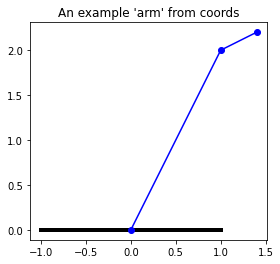

In [3]:
# Helper code for forward kinematics

import numpy as np
import matplotlib.pyplot as plt

def get_rot(theta):
    return np.array([
        [np.cos(theta), np.sin(theta), 0],
        [-np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

def get_translation(length):
    return np.array([
        [1, 0, -length],
        [0, 1, 0],
        [0, 0, 1]
    ])

def plot_arm_from_coordinates(arm_points):
    points = np.array(arm_points)
    points = np.concatenate(([[0, 0, 1]], points), axis=0)

    # Plotting
    plt.plot([-1, 1], [0, 0], 'k-', linewidth=4.0)  # plot the ground
    plt.plot(points[:, 0], points[:, 1], 'bo-')  # plot the 'arm'
    plt.gca().set_aspect('equal', adjustable='box')

# An example "arm" (from homogeneous coordinates)
plot_arm_from_coordinates([(1, 2, 1), (1.4, 2.2, 1)])
plt.title("An example 'arm' from coords")
None

### P1.2.1 Forward Kinematics of a Multi-Segment Robot

**TASK** Create a helper function `get_coords_from_arm_def` that can takes two lists: (1) `link_lengths` a list of lengths of joint angles and (2) `joint_angles` a list of angles (in radians) of the arm joints. I have provided you some "starter code" you should feel free to modify. Right now, it raises an error; your final code should not. Feel free to use the `get_rot` and `get_translation` functions I've given you above in your answer. The function should return a list of coordinate points, each of which corrsponds to the location of a joint in the arm.

> *Hint*: I recommend that you first compute the forward transformations that describe the position of the end of each segment in the "base" coordinate frame and then invert those. Regardless: sanity check your results! What angle do you expect each joint to be at? Do your plots match those?

**CODE** Include your code for this function (or a screenshot of it) in your writeup. [My function is only ~10 lines of code, for reference]

**IMAGE** Using your newly created function, run the plotting code below and include the arms in your writeup (sanity check: all the arms I've given you should be above the plane; if they dip below the y=0 line, something is wrong!)

In [4]:
# Starter code:

def get_coords_from_arm_def(link_lengths, joint_angles):
    all_coords = [
        [0, 0, 1]
    ]
    last_joint_pos = [0, 0, 1]
    angle = 0.0
    for i in range(len(link_lengths)):
      angle += joint_angles[i]
      T = get_translation(link_lengths[i]) @ get_rot(angle)
      T_inver = np.linalg.inv(T) @ [0,0,1] + last_joint_pos
      all_coords.append(T_inver)
      last_joint_pos = T_inver
    # raise NotImplementedError("You should complete this function!")
    
    return all_coords

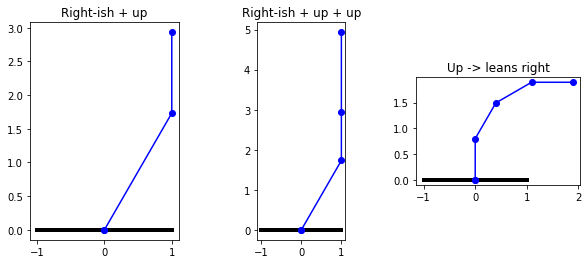

In [5]:
# Plotting Code

plt.figure(figsize=(10, 4))

plt.subplot(131)
coords = get_coords_from_arm_def([2.0, 1.2], [np.pi/3, np.pi/6])
plot_arm_from_coordinates(coords)
plt.title("Right-ish + up")

plt.subplot(132)
coords = get_coords_from_arm_def([2.0, 1.2, 2], [np.pi/3, np.pi/6, 0])
plot_arm_from_coordinates(coords)
plt.title("Right-ish + up + up")

plt.subplot(133)
coords = get_coords_from_arm_def([0.8, 0.8, 0.8, 0.8], [np.pi/2, -np.pi/6, -np.pi/6, -np.pi/6])
plot_arm_from_coordinates(coords)
plt.title("Up -> leans right")

None

### P1.2.2 Forward Transforms of a Multi-Segment Robot

**TASK** Create an alternate function `get_transform_from_arm_def(link_lengths, joint_angles)` that returns the transform from the endpoint of the robot to the base, so that the resulting SE(3) transform shows both the orientation of the final segment of the arm and the position of the end point.

> Note: this question is hard to specify and forwards/inverse transforms can be tricky in a way I don't think matters *too* much for your grade. As long as you give me either the forwards or the inverse of the transform I'm looking for, I'll mark this as correct.

**RESULT** Run the results code below and include the resulting transforms in your writeup. (Formatting these matrices would be nice, so that I don't have to parse scientific notation). These outputs correspond to the same arms as the ones above, so you can use those results to check your work.

In [12]:
def get_transform_from_arm_def(link_lengths, joint_angles):
    all_transform = [ ]
    # last_joint_pos = [0, 0, 1]
    angle = 0.0
    for i in range(len(link_lengths)):
      angle += joint_angles[i]
      T = get_translation(link_lengths[i]) @ get_rot(angle)
      T_inver = np.linalg.inv(T) #@ [0,0,1] + last_joint_pos
      all_transform.insert(0,T_inver)
      # last_joint_pos = T_inver
    # raise NotImplementedError("You should complete this function!")
    
    return all_transform

In [16]:
# Results Code
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

transform = get_transform_from_arm_def([2.0, 1.2], [np.pi/3, np.pi/6])
print("Transform 1 (Right-ish + up)")
print("[")
print(transform[0])
print(transform[1])
print("]")
transform = get_transform_from_arm_def([2.0, 1.2, 2], [np.pi/3, np.pi/6, 0])
print("Transform 2 (Right-ish + up + up)")
print("[")
print(transform[0])
print(transform[1])
print(transform[2])
print("]")

transform = get_transform_from_arm_def([0.8, 0.8, 0.8, 0.8], [np.pi/2, -np.pi/6, -np.pi/6, -np.pi/6])
print("Transform 3 (Up -> leans right)")
print("[")
print(transform[0])
print(transform[1])
print(transform[2])
print(transform[3])
print("]")

None

Transform 1 (Right-ish + up)
[
[[0.00 -1.00 0.00]
 [1.00 0.00 1.20]
 [0.00 0.00 1.00]]
[[0.50 -0.87 1.00]
 [0.87 0.50 1.73]
 [0.00 0.00 1.00]]
]
Transform 2 (Right-ish + up + up)
[
[[0.00 -1.00 0.00]
 [1.00 0.00 2.00]
 [0.00 0.00 1.00]]
[[0.00 -1.00 0.00]
 [1.00 0.00 1.20]
 [0.00 0.00 1.00]]
[[0.50 -0.87 1.00]
 [0.87 0.50 1.73]
 [0.00 0.00 1.00]]
]
Transform 3 (Up -> leans right)
[
[[1.00 -0.00 0.80]
 [0.00 1.00 0.00]
 [0.00 0.00 1.00]]
[[0.87 -0.50 0.69]
 [0.50 0.87 0.40]
 [0.00 0.00 1.00]]
[[0.50 -0.87 0.40]
 [0.87 0.50 0.69]
 [0.00 0.00 1.00]]
[[0.00 -1.00 0.00]
 [1.00 0.00 0.80]
 [0.00 0.00 1.00]]
]


### P1.2.3 Inverse kinematics of a two-segment arm

In class we discussed the inverse kinematics of a two segment arm:

![Equations for the two-segment arm's inverse kinematics.](resources/two-segment-ik.png)

![Equations for the two-segment arm's inverse kinematics.](resources/two-segment-ik-2.png)

> Note: the definitions of some of the angles are different from how we defined them in our transforms above. $\phi$ in the above figure is actually what we called $\theta_2$.

**CODE** Implement a function `inverse_kinematics_two_segment_arm(link_lengths, position)` that computes the inverse kinematic solution for a two-segment robot arm below. Include this code in your writeup.

**IMAGE** Run the plotting code below to confirm that you can reach arbitrary points in space. Include the plot(s) in your writeup. Note: that code requires that you have completed the previous question and relies on your forward transform function.

In [31]:
## Starter Code
import numpy as np

def inverse_kinematics_two_segment_arm(link_lengths, position):
    assert len(link_lengths) == 2
    assert len(position) == 2

    l1, l2 = link_lengths
    x, y = position
    dis_to_goal_2 = np.square(x) + np.square(y)
    phi = np.arccos((dis_to_goal_2 + np.square(l1)-np.square(l2))/
                    (2*l1*np.sqrt(dis_to_goal_2)))
    b = np.sqrt(dis_to_goal_2)*np.sin(phi)
    if dis_to_goal_2 > np.square(l1) + np.square(l2):
      theta2 = np.pi - np.arcsin(b/l2)
    else:
      theta2 = np.arcsin(b/l2)

    if x == 0.0 and y > 0.0:
      beta = np.pi/2
    elif x == 0.0 and y < 0.0:
      beta = -np.pi/2
    elif y ==0.0 and x > 0.0:
      beta = 0.0
    elif y == 0.0 and x < 0.0:
      beta = np.pi
    else:
      beta = np.arctan2(y,x)
    angle2 = theta2 - np.pi
    if theta2 > np.pi:
      angle1 = beta - phi
    else:
      angle1 = beta + phi
    return angle1, angle2 # theta_1, theta_2

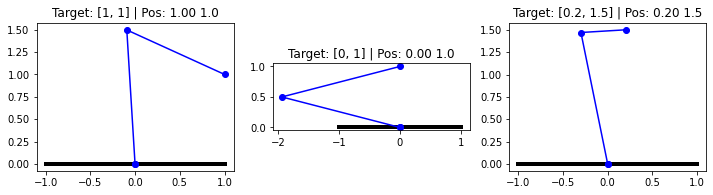

In [30]:
# Results/Plotting Code

plt.figure(figsize=(12, 12))

plt.subplot(131)
link_lengths = [1.5, 1.2]
position = [1, 1]
joint_angles = inverse_kinematics_two_segment_arm(link_lengths, position)
coords = get_coords_from_arm_def(link_lengths, joint_angles)
plot_arm_from_coordinates(coords)
plt.title(f"Target: {position} | Pos: {coords[-1][0]:0.2f} {coords[-1][1]:0.1f}")

plt.subplot(132)
link_lengths = [2, 2]
position = [0, 1]
joint_angles = inverse_kinematics_two_segment_arm(link_lengths, position)
coords = get_coords_from_arm_def(link_lengths, joint_angles)
plot_arm_from_coordinates(coords)
plt.title(f"Target: {position} | Pos: {coords[-1][0]:0.2f} {coords[-1][1]:0.1f}")

plt.subplot(133)
link_lengths = [1.5, 0.5]
position = [0.2, 1.5]
joint_angles = inverse_kinematics_two_segment_arm(link_lengths, position)
coords = get_coords_from_arm_def(link_lengths, joint_angles)
plot_arm_from_coordinates(coords)
plt.title(f"Target: {position} | Pos: {coords[-1][0]:0.2f} {coords[-1][1]:0.1f}")

None

### P1.2.4 Inverse Kinematics for a three-segment arm

Now we want to solve for the joint angles of a three-segment arm. Not only do we want to put the end at a particular point, but we also want to control the *angle* of the final segment of the arm. I should be able to hold a glass of water with the end of the arm and lift it up and down without tipping it over (i.e., sweep over y while keeping angle fixed.)

**TASK** Complete the `inverse_kinematics_three_segment_arm` below. Your aim is to put the arm in a configuration such that the endpoint is both at the target position and oriented according to the target angle. It is your job to figure out how to solve this problem by building on the concepts discussed so far. You should feel free to use any functions you have implemented so far in your solution.

**CODE** Include the resulting function in your writeup.

**IMAGES** I have provided you with some fairly detailed plotting code below that you should use to confirm your approach is working. Include all plots in your writeup.

In [45]:
## Starter Code
def inverse_kinematics_three_segment_arm(link_lengths, position, angle):
    l1, l2, l3 = link_lengths
    x, y = position
    delta_xl3 = l3*np.cos(angle)
    delta_yl3 = l3*np.sin(angle)
    new_x = x - delta_xl3
    new_y = y - delta_yl3
    angle1, angle2 = inverse_kinematics_two_segment_arm([l1,l2], [new_x, new_y])
    angle3 = angle - angle1 - angle2
    return angle1, angle2, angle3 #theta_1, theta_2, theta_3

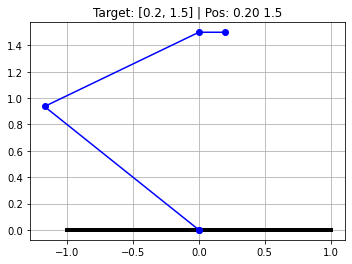

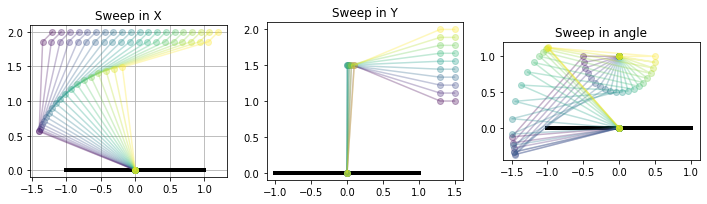

In [46]:
# Plotting Code

link_lengths = [1.5, 1.3, 0.2]
position = [0.2, 1.5]
angle = 0.0
joint_angles = inverse_kinematics_three_segment_arm(link_lengths, position, angle)
coords = get_coords_from_arm_def(link_lengths, joint_angles)
plot_arm_from_coordinates(coords)
plt.grid()
plt.title(f"Target: {position} | Pos: {coords[-1][0]:0.2f} {coords[-1][1]:0.1f}")

import matplotlib.pylab as pl

plt.figure(figsize=(12, 12))

# X-sweep
plt.subplot(131)
plt.grid()
plt.plot([-1, 1], [0, 0], 'k-', linewidth=4.0)  # plot the ground
plt.gca().set_aspect('equal', adjustable='box')
N = 20
colors = pl.cm.viridis(np.linspace(0, 1, N))
xs = np.linspace(-1.2, 1.2, N)
for color, x in zip(colors, xs):
    link_lengths = [1.5, 1.3, 0.2]
    position = [x, 2.0]
    angle = np.pi/4
    joint_angles = inverse_kinematics_three_segment_arm(link_lengths, position, angle)
    coords = get_coords_from_arm_def(link_lengths, joint_angles)
    points = np.array(coords)
    
    plt.plot(points[:, 0], points[:, 1], 'o-', color=color, alpha=0.3)  # plot the 'arm'

plt.title("Sweep in X")

# Y-sweep
plt.subplot(132)
plt.plot([-1, 1], [0, 0], 'k-', linewidth=4.0)  # plot the ground
plt.gca().set_aspect('equal', adjustable='box')
N = 10
colors = pl.cm.viridis(np.linspace(0, 1, N))
ys = np.linspace(1, 2, N)
for color, y in zip(colors, ys):
    link_lengths = [1.5, 1.3, 0.2]
    position = [1.5, y]
    angle = 0
    joint_angles = inverse_kinematics_three_segment_arm(link_lengths, position, angle)
    coords = get_coords_from_arm_def(link_lengths, joint_angles)
    points = np.array(coords)
    plt.plot(points[:, 0], points[:, 1], 'o-', color=color, alpha=0.3)  # plot the 'arm'

plt.title("Sweep in Y")

# theta-sweep
plt.subplot(133)
plt.plot([-1, 1], [0, 0], 'k-', linewidth=4.0)  # plot the ground
plt.gca().set_aspect('equal', adjustable='box')
N = 20
colors = pl.cm.viridis(np.linspace(0, 1, N))
angless = np.linspace(0, np.pi, N)
for color, angle in zip(colors, angless):
    link_lengths = [1.5, 1.5, 0.5]
    position = [0.0, 1.0]
    joint_angles = inverse_kinematics_three_segment_arm(link_lengths, position, angle)
    coords = get_coords_from_arm_def(link_lengths, joint_angles)
    points = np.array(coords)
    plt.plot(points[:, 0], points[:, 1], 'o-', color=color, alpha=0.3)  # plot the 'arm'

plt.title("Sweep in angle")

None

## P1.3 Experimenting with MoveIt ROS

In this problem, I simply want you to work through one of the basic tutorials for the MoveIt motion planning and simulation framework. You will build some of the basic starter code and reproduce the short demo that I showed you in L02.

> This demo is mostly to get you to play around with the software and also to make sure that you can run something a bit more resource intensive on your machine. For those of you working in a group, it is possible to complete these tasks without installing anything locally and just using your group-mate's images. I would recommend that you try to install it on your machine as well, just to be sure everything works.


**TASK** First, follow the Getting Started Guide: https://ros-planning.github.io/moveit_tutorials/doc/getting_started/getting_started.html [Note: the build process took me 12 minutes on my 2-core, 4GB RAM virtual machine. Taking a short while is not abnormal.]

**TASK** Second, follow the "MoveIt Quickstart in RViz" tutorial: https://ros-planning.github.io/moveit_tutorials/doc/quickstart_in_rviz/quickstart_in_rviz_tutorial.html

**IMAGES** Take a few screenshots (3–5) to show me that you've gotten the software to work and that you have interacted with the robot and played around with some of the MoveIt planning and visualization. Include these in your writeup.


# P1.4 A Differential Drive Vehicle

In class, we discussed a differential drive vehicle, a simple robot with two wheels that can spin at independent rates. For example, if the left wheel turns faster than the right, the vehicle will turn right. The linear velocity of the vehicle is the sum of the two wheel spin velocities (`0.5 * (vl + vr)`). The rotational velocity is proportional to the difference between those two velocities.

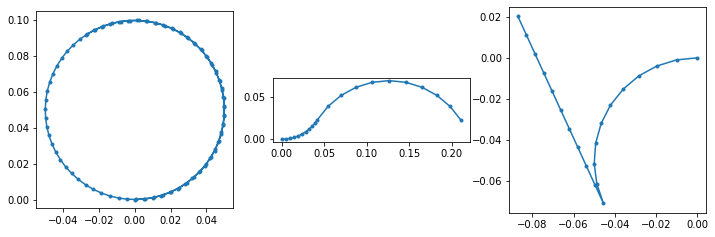

In [20]:
## Definition of the Differential Drive vehicle (and examples)

import numpy as np
import matplotlib.pyplot as plt

# Inspired by: https://w3.cs.jmu.edu/molloykp/teaching/cs354/cs354_2021Fall/resources/pid.pdf
# Some equations from: https://www.cs.columbia.edu/~allen/F17/NOTES/icckinematics.pdf

class DiffDrive(object):
    def __init__(self, width=0.1, error_std=0, max_spin=1):
        self.pos_x = 0
        self.pos_y = 0
        self.theta = 0
        self.width = 0.1
        self.max_spin = max_spin
        self.vel = 0
        self.error_std = error_std
        
        self.states = [[self.pos_x, self.pos_y, self.theta]]
    
    def command(self, vl, vr):
        if np.abs(vl) > self.max_spin:
            vl = vl / np.abs(vl)
        if np.abs(vr) > self.max_spin:
            vr = vr / np.abs(vr)
            
        self.vl = vl
        self.vr = vr
        # self.vel += u
        
    def advance_time(self, dt):
        # Error in the velocity
        
        if np.abs(self.vr - self.vl) < 0.0001:
            # Robot moves in a straight line
            self.pos_x += self.vr * dt * np.cos(self.theta)
            self.pos_y += self.vr * dt * np.sin(self.theta)
            self.states.append([self.pos_x, self.pos_y, self.theta])
            return
        
        R = self.width / 2 * (self.vl + self.vr) / (self.vr - self.vl)
        omega = (self.vr - self.vl) / self.width
        # Instantaneous Center of Curvature (ICC)
        ICCx = self.pos_x - R * np.sin(self.theta)
        ICCy = self.pos_y + R * np.cos(self.theta)
        
        domega = omega * dt

        updated_state = np.array([
            [np.cos(domega), -np.sin(domega), 0],
            [np.sin(domega), np.cos(domega), 0],
            [0, 0, 1]
        ]) @ np.array([
            [self.pos_x - ICCx],
            [self.pos_y - ICCy],
            [self.theta]
        ]) + np.array([
            [ICCx],
            [ICCy],
            [domega]
        ])

        self.pos_x = updated_state[0, 0]
        self.pos_y = updated_state[1, 0]
        self.theta = updated_state[2, 0]
        
        self.states.append([self.pos_x, self.pos_y, self.theta])
        
    def visualize_trajectory(self):
        points = np.array(self.states)
        plt.plot(points[:, 0], points[:, 1], '.-')
        plt.gca().set_aspect('equal', adjustable='box')


# Here are a few examples of driving the car around

plt.figure(figsize=(12,6))

plt.subplot(131)
car = DiffDrive()
for _ in range(100):
    car.command(0, 0.1)
    car.advance_time(0.1)

car.visualize_trajectory()

plt.subplot(132)
car = DiffDrive()
for _ in range(10):
    car.command(0, 0.1)
    car.advance_time(0.1)

for _ in range(10):
    car.command(0.3, 0.1)
    car.advance_time(0.1)

car.visualize_trajectory()

plt.subplot(133)
car = DiffDrive()
for _ in range(10):
    car.command(-0.2, 0.0)
    car.advance_time(0.1)

for _ in range(10):
    car.command(0.1, 0.1)
    car.advance_time(0.1)

car.visualize_trajectory()

None

## P1.4.1 A simple differential drive controller


Below, I have given you some starter code in `simple_diff_drive_controller` that is supposed to define a simple controller. In it, I have computed a few intermediate properties: `theta_rel` is the relative angle to the goal in the frame of the vehicle; `dist` is the distance to the goal in the frame of the vehicle.

The controller is meant to (1) point the vehicle in the direction of the goal and (2) move the vehicle forwards until it reaches the goal.

**TASK** Inspired by the simple 1D controller, complete this controller. The vehicle should simultaneously turn and move (so it should not turn in place and then move; it should instead form smooth trajectories to the target point). (1) It should turn at a rate proportional to the relative angle between the vehicle and the angle to the goal (`theta_rel`). (2) The speed of the vehicle should be proportional to the distance to the goal.

**WRITING** Include in your writeup your definitions for the wheel velocities. In 1--2 sentences, describe how you developed these definitions.

**IMAGES** Run the plotting code below, which produces a single plot showing your controller navigating the vehicle to a handful of points.

In [22]:
## Starter Code

def simple_diff_drive_controller(car, gx, gy, K_theta, K_vel, dt=0.5, traj=False):
    # gx is the goal x position
    # gy is the goal y position
    omega_vel_ratio = 10.0
    last_theta_rel = 0.0
    last_dist = 0.0
    for t in np.arange(0, 100, dt):
        theta_rel = np.arctan2(gy - car.pos_y, gx - car.pos_x) - car.theta
        theta_rel = theta_rel % (2 * np.pi)
        if theta_rel > np.pi:
            theta_rel -= 2 * np.pi
            
        dist = np.sqrt(
            (gy - car.pos_y) ** 2 + (gx - car.pos_x) ** 2
        )
        if traj:
          if dist < 0.4:
            break
        vl = None
        vr = None
        if vl is None or vr is None:
            omega1 = omega_vel_ratio*(K_theta*theta_rel + \
                              0.01*(theta_rel-last_theta_rel)/dt)
            vel1 = K_vel*dist + 0.02*(dist-last_dist)
            vl = vel1 - 0.5*omega1*car.width
            vr = vel1 + 0.5*omega1*car.width
        last_theta_rel = theta_rel
        last_dist = dist

        car.command(vl, vr)
        car.advance_time(dt)
    
    return car.states

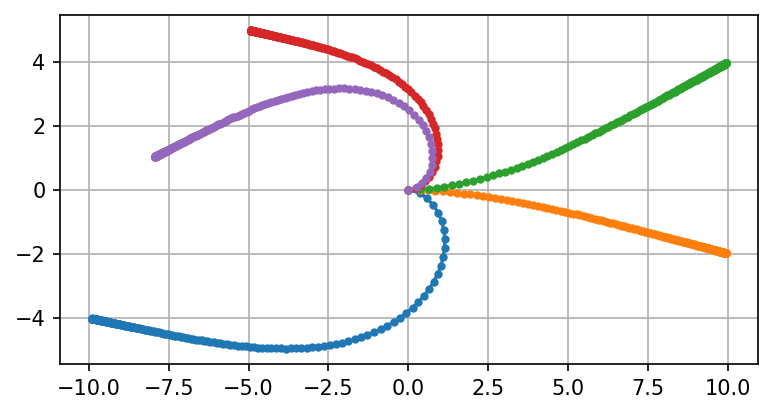

In [23]:

plt.figure(figsize=(6, 6), dpi=150)
plt.grid()

car = DiffDrive()
simple_diff_drive_controller(car, gx=-10, gy=-4, K_theta=0.02, K_vel=0.05)
car.visualize_trajectory()

car = DiffDrive()
simple_diff_drive_controller(car, gx=10, gy=-2, K_theta=0.02, K_vel=0.05)
car.visualize_trajectory()

car = DiffDrive()
simple_diff_drive_controller(car, gx=10, gy=4, K_theta=0.02, K_vel=0.05)
car.visualize_trajectory()

car = DiffDrive()
simple_diff_drive_controller(car, gx=-5, gy=5, K_theta=0.02, K_vel=0.05)
car.visualize_trajectory()

car = DiffDrive()
simple_diff_drive_controller(car, gx=-8, gy=1, K_theta=0.02, K_vel=0.05)
car.visualize_trajectory()

## P1.4.2 A more complex controller

[There is no coding required for this question!]

In the previous question (P1.4.1), you were able to directly command a wheel velocity for each of the wheels. However, on a real robot, you may not be able to, instead specifying an acceleration or deceleration to get to the values you need to reach your target. In class, we discussed a 1D controller that had a similar structure: we wanted to set the location of the train, but were only able to change its velocity.

**QUESTION** [3--5 sentences] Describe how the *model of the Differential Drive vehicle* would need to change to accomodate this change. Your response should include (1) the internal state parameters, (2) the needed changes to the `command` function, and (3) the needed changes to the `advance_time` function. No code is necessary for this question, but if writing code and referring to it is helpful to you, feel free to do so. However, a code-only solution will not be accepted: you must justify your changes/decisions.

**QUESTION** [2--5 sentences] The `simple_diff_drive_controller` is insufficient for this updated vehicle. Describe an updated PID controller—inspired by both the `simple_diff_drive_controller` and the PD controller from class—that would successfully navigate this vehicle towards a waypoint.

### New vehicle conf.

In [96]:
## Definition of the Differential Drive vehicle (and examples)

import numpy as np
import matplotlib.pyplot as plt

# Inspired by: https://w3.cs.jmu.edu/molloykp/teaching/cs354/cs354_2021Fall/resources/pid.pdf
# Some equations from: https://www.cs.columbia.edu/~allen/F17/NOTES/icckinematics.pdf

class DiffDrive_new(object):
    def __init__(self, width=0.1, error_std=0, max_torque=1):
        self.pos_x = 0
        self.pos_y = 0
        self.theta = 0
        self.width = 0.1
        self.r = 0.02
        self.max_torque = max_torque
        self.vl = 0.0
        self.vr = 0.0
        self.omega_l = 0.0
        self.omega_r = 0.0
        self.tau_l = 0.0
        self.tau_r = 0.0
        
        
        self.states = [[self.pos_x, self.pos_y, self.theta]]
    
    def command(self, to_l, to_r):
        if np.abs(to_l) > self.max_torque:
            to_l = to_l / np.abs(to_l)
        if np.abs(to_r) > self.max_torque:
            to_r = to_r / np.abs(to_r)    
        self.tau_l = to_l
        self.tau_r = to_r
        
    def advance_time(self, dt):
        # Error in the velocity
        self.omega_r += self.tau_r*dt
        self.omega_l += self.tau_l*dt  
        self.vr = self.omega_r*self.r
        self.vl = self.omega_l*self.r
        if np.abs(self.vr - self.vl) < 0.0001:
            # Robot moves in a straight line
            self.pos_x += self.vr * dt * np.cos(self.theta)
            self.pos_y += self.vr * dt * np.sin(self.theta)
            self.states.append([self.pos_x, self.pos_y, self.theta])
            return
        
        R = self.width / 2 * (self.vl + self.vr) / (self.vr - self.vl)
        omega = (self.vr - self.vl) / self.width
        # Instantaneous Center of Curvature (ICC)
        ICCx = self.pos_x - R * np.sin(self.theta)
        ICCy = self.pos_y + R * np.cos(self.theta)
        
        domega = omega * dt

        updated_state = np.array([
            [np.cos(domega), -np.sin(domega), 0],
            [np.sin(domega), np.cos(domega), 0],
            [0, 0, 1]
        ]) @ np.array([
            [self.pos_x - ICCx],
            [self.pos_y - ICCy],
            [self.theta]
        ]) + np.array([
            [ICCx],
            [ICCy],
            [domega]
        ])

        self.pos_x = updated_state[0, 0]
        self.pos_y = updated_state[1, 0]
        self.theta = updated_state[2, 0]
        
        self.states.append([self.pos_x, self.pos_y, self.theta])
        
    def visualize_trajectory(self):
        points = np.array(self.states)
        plt.plot(points[:, 0], points[:, 1], '.-')
        plt.gca().set_aspect('equal', adjustable='box')

### New Controller

In [109]:
def new_diff_drive_controller(car, gx, gy, K_theta_p, K_theta_d, K_vel_p, K_vel_d, dt=0.3, traj=False):
    # gx is the goal x position
    # gy is the goal y position
    # omega_vel_ratio = 0.05
    last_theta_rel = 0.0
    last_dist = 0.0
    I_theta = 0.0
    I_dist = 0.0
    for t in np.arange(0, 400, dt):
        theta_rel = np.arctan2(gy - car.pos_y, gx - car.pos_x) - car.theta
        theta_rel = theta_rel % (2 * np.pi)
        if theta_rel > np.pi:
            theta_rel -= 2 * np.pi
            
        dist = np.sqrt(
            (gy - car.pos_y) ** 2 + (gx - car.pos_x) ** 2
        )
        if traj:
          if dist < 0.4:
            break
        to_l = None
        to_r = None
        if to_l is None or to_r is None:
            I_theta += theta_rel*dt 
            I_dist = dist*dt
            to_rot = K_theta_p*theta_rel + K_theta_d*(theta_rel-last_theta_rel)/dt + 0.05*I_theta
            to_linear = K_vel_p*dist + K_vel_d*(last_dist-dist)/dt + 0.05*I_dist
            to_l = (to_linear - to_rot/car.width)*0.5*car.r
            to_r = (to_linear + to_rot/car.width)*0.5*car.r
        last_dist = dist
        last_theta_rel = theta_rel
        car.command(to_l, to_r)
        car.advance_time(dt)
    
    return car.states

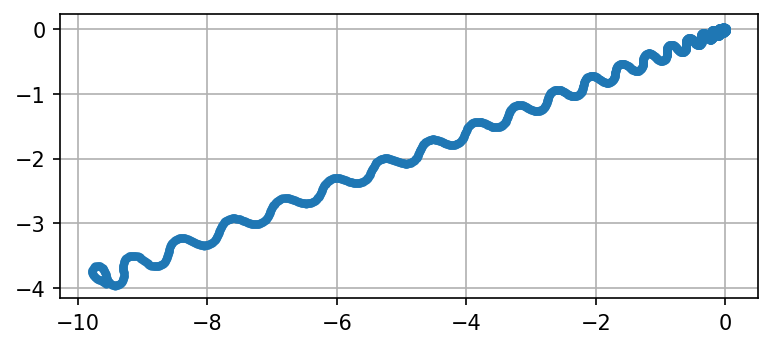

In [110]:
plt.figure(figsize=(6, 6), dpi=150)
plt.grid()

car1 = DiffDrive_new()
new_diff_drive_controller(car1, gx=-10, gy=-4, K_theta_p=0.1, K_theta_d=0.01, K_vel_p=0.1,K_vel_d=0.02)
car1.visualize_trajectory()

## 1.4.3 Waypoint Following

**TASK** Using your code from the controller above, write a new function that follows a series of waypoints. The robot should navigate towards a waypoint and then, when it gets within a distance of 0.5 of the current waypoint, it should switch to the next. Run your code on the following series of points:

```
 x,  y
------
 1,  5
-5,  3
-5, -3
 4, 10
```

**IMAGES** Visualize the resultant trajectory using your waypoint following code and include the trajectory in your writeup. Change the parameters `K_vel` and `K_theta` and observe the effect on the trajectories; include some of these resulting trajectories in your writeup.

**QUESTION** [2--3 sentences] How does the relationship between `K_vel` and `K_theta` impact the shape of the trajectories? Describe this relationship.

 

In [18]:
def follow_a_trajectory(car, trajectory):
  for i in range(len(trajectory)):
    simple_diff_drive_controller(car, trajectory[i][0], \
        trajectory[i][1], K_theta=0.025, K_vel=0.05, traj=True)

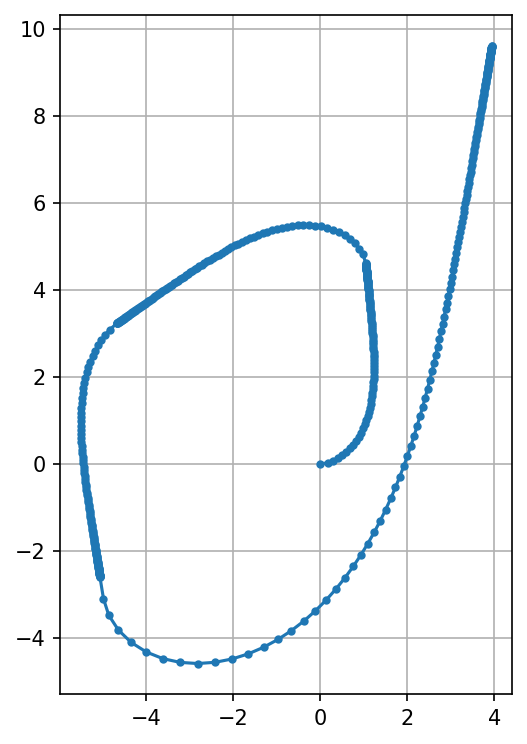

In [21]:
plt.figure(figsize=(6, 6), dpi=150)
plt.grid()
car = DiffDrive()
trajectory = [[1,5], [-5,3], [-5,-3], [4,10]]
follow_a_trajectory(car, trajectory)
car.visualize_trajectory()